# Explore datasets

In [1]:
import json
import glob
import csv
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

from tqdm.auto import tqdm
tqdm.pandas()

## 1. BLBooks

In [2]:
blb_df = pd.read_csv("data/blb_processed/bl_books_machine_words.csv")
blb_df_machine = blb_df[blb_df.hits.str.contains("(?i)machine")]

print("Mentions of machines in the corpus:", blb_df_machine.shape[0])

Mentions of machines in the corpus: 199281


In [3]:
blb_metadata_df = pd.read_csv("data/blb_processed/BLB_metadata.csv")

# Add year to blb machine df:
def add_blb_year(bookpath, blb_metadata):
    bookid = int(bookpath.split("_")[0])
    try:
        year_to_return = int(blb_metadata[blb_metadata["identifier"] == bookid].iloc[0].date)
    except ValueError:
        year_to_return = 0
    return year_to_return

if not Path("data/blb_processed/blb_machine_with_year.pkl").exists():
    blb_df_machine["year"] = blb_df_machine.progress_apply(lambda row : add_blb_year(row['article_path'], blb_metadata_df), axis = 1)
    blb_df_machine.to_pickle("data/blb_processed/blb_machine_with_year.pkl")

In [4]:
blb_df_machine = pd.read_pickle("data/blb_processed/blb_machine_with_year.pkl")
print("Mentions of machines in the corpus:", blb_df_machine.shape[0])

Mentions of machines in the corpus: 199281


In [5]:
blb_df_machine = blb_df_machine[blb_df_machine["year"] > 0]
print("Mentions of machines in the corpus:", blb_df_machine.shape[0])

Mentions of machines in the corpus: 198150


In [6]:
blb_df_machine_synparsed = pd.read_pickle("data/blb_processed/BLB_machine_synparsed.pkl")
print("Sentences with machines we keep:", blb_df_machine_synparsed.shape[0])

Sentences with machines we keep: 131002


## 2. HMD

In [7]:
main_hmd_machine_df = pd.DataFrame(columns = ['Unnamed: 0', 'article_path', 'prev_sentence', 'target_sentence', 'next_sentence', 'hits'])

count_machines = 0
for i in glob.glob("data/hmd_processed/hmd_data_machine_words/*"):
    hmd_df_tmp = pd.read_csv(i)
    hmd_df_machine = hmd_df_tmp[hmd_df_tmp.hits.str.contains("(?i)machine")]
    count_machines += hmd_df_machine.shape[0]
    main_hmd_machine_df = pd.concat([main_hmd_machine_df, hmd_df_machine], ignore_index=False)
    
print("Mentions of machines in the corpus:", count_machines)
print("Mentions of machines in the corpus:", main_hmd_machine_df.shape[0])

Mentions of machines in the corpus: 66701
Mentions of machines in the corpus: 66701


In [8]:
hmd_metadata = pd.read_csv("data/hmd_processed/HMD_metadata_all.csv")

# Add year to hmd machine df:
def add_hmd_year(artpath, hmd_metadata):
    lastpart = artpath.split("/")[-1]
    no_ext = lastpart.split(".txt")[0]
    publcode, issuecode, artcode = no_ext.split("_")
    publcode = int(publcode)
    issuecode = int(issuecode)
    relv_df = hmd_metadata[(hmd_metadata["issue_code"] == issuecode) & (hmd_metadata["publication_code"] == publcode)]
    artdate = relv_df.iloc[0].issue_date
    artyear = int(artdate.split("-")[0])
    return artyear

if not Path("data/hmd_processed/hmd_machine_with_year.pkl").exists():
    main_hmd_machine_df["year"] = main_hmd_machine_df.progress_apply(lambda row : add_hmd_year(row['article_path'], hmd_metadata), axis = 1)
    main_hmd_machine_df.to_pickle("data/hmd_processed/hmd_machine_with_year.pkl")

In [9]:
hmd_df_machine = pd.read_pickle("data/hmd_processed/hmd_machine_with_year.pkl")
hmd_df_machine.shape[0]

66701

In [10]:
hmd_df_machine_synparsed = pd.read_pickle("data/hmd_processed/HMD_machine_synparsed.pkl")
print("Sentences with machines we keep:", hmd_df_machine_synparsed.shape[0])

Sentences with machines we keep: 35674


In [11]:
hmd_df_machine.head()

,Unnamed: 0,article_path,prev_sentence,target_sentence,next_sentence,hits,year
1,1,0002244/1855/0915/0002244_18550915_art0006.txt,Men can continue to work and breath in an expl...,This machine consists of a small wheel of stee...,Although in the day the light appears very fee...,machine,1855
2,2,0002244/1855/0811/0002244_18550811_art0023.txt,Warranted to last Fifty Years and to repay its...,Thd action of this machine is powerful and sim...,"By turning the/wheel from left to right , the ...",machine,1855
0,0,0002647/1814/1227/0002647_18141227_art0017.txt,IVith the i pilot vessel .,Having mg towed this infernal machine ' be bro...,"He would not prikend • to say with whom , the ...",machine,1814
1,1,0002647/1814/1205/0002647_18141205_art0004.txt,These prints have joined issue to day in a tri...,"It were well could , the inventors of the Titn...","WAasaw , Nov . 14.—111 s • Imperial Highness P...",machine,1814
2,2,0002647/1814/0217/0002647_18140217_art0003.txt,"On Wednesday se 'nnight , a yootli if Onset 16...",By the elder and younger BYRNEs ' iof a thrash...,The death of this yeuth is said tend Mil ' 511...,machine,1814


## 3. JSA

In [12]:
jsa_metadata = pd.read_csv("data/jsa_processed/JSA_metadata.tsv", sep="\t")

journal = "The Journal of the Society of Arts"
print(journal)
print("First article:", jsa_metadata[jsa_metadata["journal_title"] == journal].year.min())
print("Last article:", jsa_metadata[jsa_metadata["journal_title"] == journal].year.max())
print("Number articles:", len(jsa_metadata[jsa_metadata["journal_title"] == journal].article_id.unique()))
print("Number volumes:", len(jsa_metadata[jsa_metadata["journal_title"] == journal].volume.unique()))
print()

journal = "Transactions of the Society, Instituted at London, for the Encouragement of Arts, Manufactures, and Commerce"
print(journal)
print("First article:", jsa_metadata[jsa_metadata["journal_title"] == journal].year.min())
print("Last article:", jsa_metadata[jsa_metadata["journal_title"] == journal].year.max())
print("Number articles:", len(jsa_metadata[jsa_metadata["journal_title"] == journal].article_id.unique()))
print("Number volumes:", len(jsa_metadata[jsa_metadata["journal_title"] == journal].volume.unique()))

print("\nJointly:", len(jsa_metadata.article_id.unique()))

The Journal of the Society of Arts
First article: 1852
Last article: 1908
Number articles: 3758
Number volumes: 56

Transactions of the Society, Instituted at London, for the Encouragement of Arts, Manufactures, and Commerce
First article: 1783
Last article: 1844
Number articles: 1411
Number volumes: 54

Jointly: 5169


In [13]:
jsa_df = pd.read_csv("data/jsa_processed/JSA_machine.tsv", sep="\t")
jsa_df_machine = jsa_df[jsa_df.targetExpression.str.contains("(?i)machine")]

print("Mentions of machines in the corpus:", jsa_df_machine.shape[0])

Mentions of machines in the corpus: 26487


In [14]:
jsa_df_machine_synparsed = pd.read_pickle("data/jsa_processed/JSA_machine_synparsed.pkl")
print("Sentences with machines we keep:", jsa_df_machine_synparsed.shape[0])

Sentences with machines we keep: 18424


## 4. RSC

In [15]:
rsc_metadata = pd.read_csv("data/rsc_processed/RSC_metadata.tsv", sep="\t")
rsc_metadata = rsc_metadata[(rsc_metadata["year"] >= 1783) & (rsc_metadata["year"] <= 1908)]

print("First article:", rsc_metadata.year.min())
print("Last article:", rsc_metadata.year.max())
print("Number articles:", len(rsc_metadata.id.unique()))
print("Number volumes:", len(rsc_metadata.volume.unique()))

First article: 1783
Last article: 1908
Number articles: 11387
Number volumes: 208


In [16]:
rsc_df = pd.read_csv("data/rsc_processed/RSC_machine.tsv", sep="\t")
rsc_df_machine = rsc_df[rsc_df.targetExpression.str.contains("(?i)machine")]

print("Mentions of machines in the corpus:", rsc_df_machine.shape[0])

Mentions of machines in the corpus: 3015


In [17]:
rsc_df_machine_synparsed = pd.read_pickle("data/rsc_processed/RSC_machine_synparsed.pkl")
print("Sentences with machines we keep:", rsc_df_machine_synparsed.shape[0])

Sentences with machines we keep: 2438


## ALL

In [18]:
rsc_df_machine_bert = pd.read_pickle("data/rsc_processed/RSC_machine_synparsed_pred_bert.pkl")
jsa_df_machine_bert = pd.read_pickle("data/jsa_processed/JSA_machine_synparsed_pred_bert.pkl")
hmd_df_machine_bert = pd.read_pickle("data/hmd_processed/HMD_machine_synparsed_pred_bert.pkl")
blb_df_machine_bert = pd.read_pickle("data/blb_processed/BLB_machine_synparsed_pred_bert.pkl")

In [19]:
dict_synparsed = {"rsc": rsc_df_machine_synparsed,
                  "jsa": jsa_df_machine_synparsed,
                  "hmd": hmd_df_machine_synparsed,
                  "blb": blb_df_machine_synparsed}

dict_machines = {"rsc": rsc_df_machine,
                 "jsa": jsa_df_machine,
                 "hmd": hmd_df_machine,
                 "blb": blb_df_machine}

dict_bert = {"rsc": rsc_df_machine_bert,
             "jsa": jsa_df_machine_bert,
             "hmd": hmd_df_machine_bert,
             "blb": blb_df_machine_bert}

In [20]:
blb_df_machine_synparsed["year"] = blb_df_machine_synparsed["date"]

In [21]:
dys_all = dict() # Dictionary sentences per year using all data
dys_filt = dict() # Dictionary sentences per year using filtered data

for kd in dict_synparsed:
    for y in dict_machines[kd].year:
        if y in range(1783, 1909):
            if kd in dys_all:
                if y in dys_all[kd]:
                    dys_all[kd][y] += 1
                else:
                    dys_all[kd][y] = 1
            else:
                dys_all[kd] = {y : 1}
    for y in dict_synparsed[kd].year:
        if y in range(1783, 1909):
            if kd in dys_filt:
                if y in dys_filt[kd]:
                    dys_filt[kd][y] += 1
                else:
                    dys_filt[kd][y] = 1
            else:
                dys_filt[kd] = {y : 1}

In [22]:
corpus_to_title = {"RSC": "Royal Society Corpus",
                   "JSA": "Journal of the Society of Arts",
                   "HMD": "Heritage Made Digital newspapers",
                   "BLB": "Microsoft British Library books"}

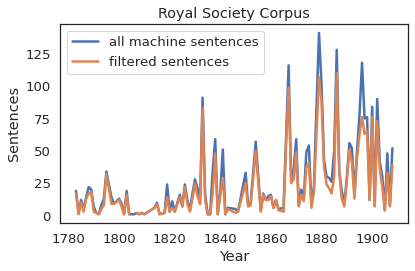

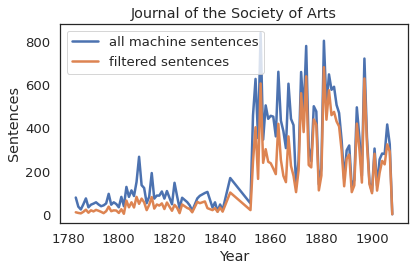

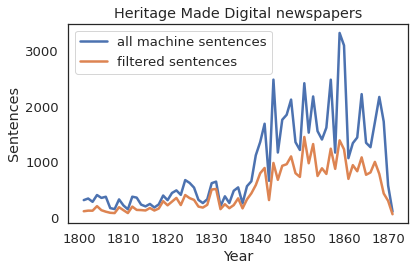

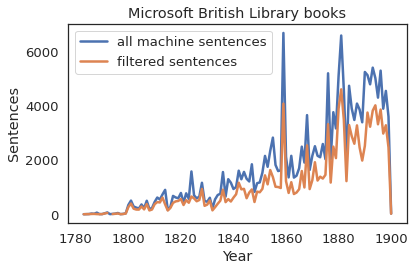

In [23]:
for k in dys_all:
    comb_df = pd.DataFrame({'all machine sentences':pd.Series(dys_all[k]),'filtered sentences':pd.Series(dys_filt[k])})
    comb_df.plot(title=corpus_to_title[k.upper()], xlabel="Year", ylabel="Sentences")
    plt.tight_layout() 
    plt.savefig("figures/" + k + ".png", dpi=300)
    comb_df.to_csv("figures/" + k + "_numbers.tsv", sep="\t")

In [30]:
for k in dys_filt:
    all_values = [dys_filt[k][c] for c in dys_filt[k]]
    print(k, sum(all_values))

rsc 2438
jsa 18424
hmd 35674
blb 131002


In [31]:
2438+18424+35674+131002

187538